# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_theme()

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [2]:
raw_data = pd.read_csv('Countries_exercise.csv')
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

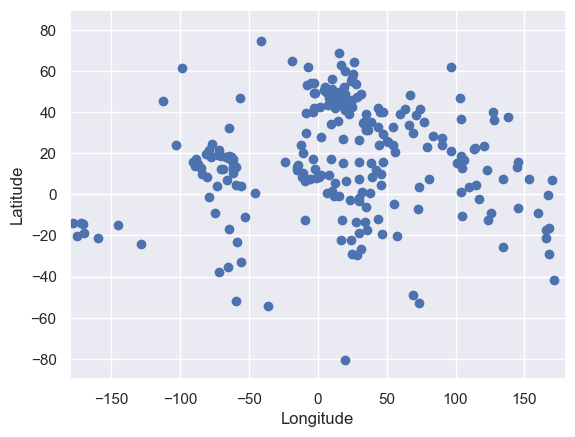

In [3]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [4]:
data = raw_data.iloc[:, 1:]
data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


## Clustering

Use 4 clusters initially.

In [5]:
k = 4
kmeans = KMeans(k)
kmeans.fit(data)

c:\Users\diogo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### Clustering results

In [6]:
clusters = kmeans.fit_predict(data)
clusters

c:\Users\diogo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 2, 0, 1, 2, 3, 0, 0, 3, 3, 3,
       2, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 3, 1, 2, 3, 0,
       0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 0, 0,
       3, 3, 0, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1,
       2, 1, 2, 0, 1, 3, 1, 3, 2, 3, 0, 2, 0, 3, 0, 0, 3, 0, 3, 1, 3, 0,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 3, 0, 2, 0, 3, 3, 1, 3, 0, 0, 3, 3, 3,
       2, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 3, 2, 3, 2, 2, 0, 3, 1, 0, 0, 2,
       0, 2, 3, 2, 3, 1, 1, 3, 3, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 3, 1,
       2, 3, 1, 0, 1, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 1, 3, 2, 3, 1, 3, 0,
       0, 1, 3, 0, 1, 3, 3, 3, 0, 1, 0, 0, 1, 0, 3, 2, 0, 0, 2, 1, 1, 3,
       3, 2, 0, 0, 3, 1, 1, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [7]:
data_w_clusters = data.copy()
data_w_clusters['Cluster'] = clusters
data_w_clusters.head()

,Longitude,Latitude,Cluster
0,-69.982677,12.520880,1
1,66.004734,33.835231,0
2,17.537368,-12.293361,0
3,-63.064989,18.223959,1
4,20.049834,41.142450,3


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

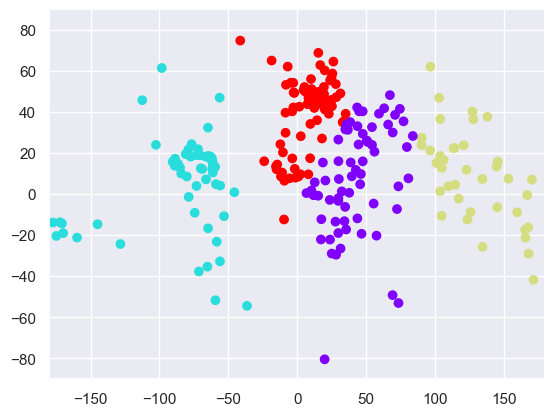

In [8]:
plt.scatter(data_w_clusters['Longitude'], data_w_clusters['Latitude'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [9]:
kmeans.inertia_

256573.086759343

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [10]:
import warnings
warnings.filterwarnings("ignore")

results = []
for k in range(1, 21):
    kmeans_test = KMeans(k)
    kmeans_test.fit(data)
    results.append(kmeans_test.inertia_)
results = np.array(results)
results

array([1413859.67983443,  657012.07975863,  325235.52237056,
        256590.58575406,  192194.98290025,  151828.96802208,
        126990.80050429,  102913.99944185,   84967.41720068,
         76439.49644819,   69634.35871876,   63212.91953683,
         59476.6625467 ,   55769.37966548,   50191.06574752,
         47220.99580512,   44657.444624  ,   40719.15040054,
         39071.54964681,   37255.15265643])

### The Elbow Method

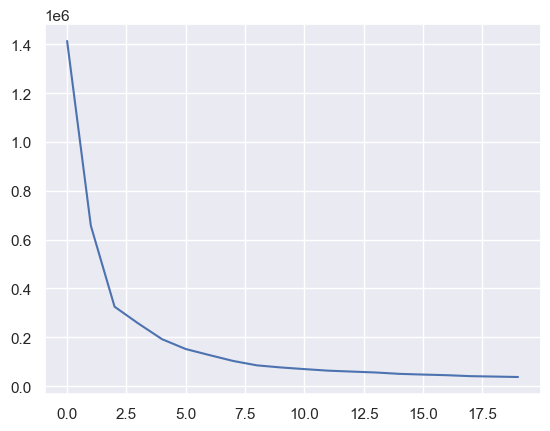

In [11]:
plt.plot(results)
plt.show()

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

- I would use 2 or 3 clusters for this data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

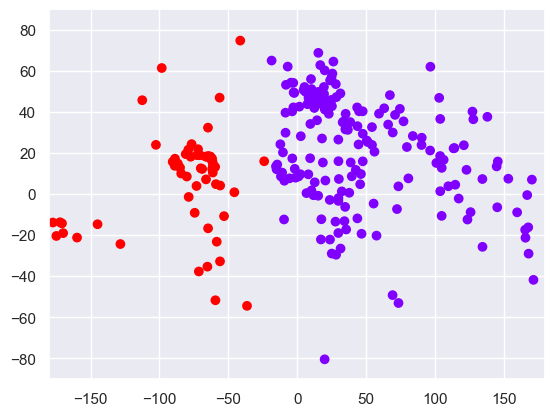

In [12]:
k = 2
kmeans = KMeans(k)
kmeans.fit(data)

plt.scatter(data_w_clusters['Longitude'], data_w_clusters['Latitude'], c=kmeans.predict(data), cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

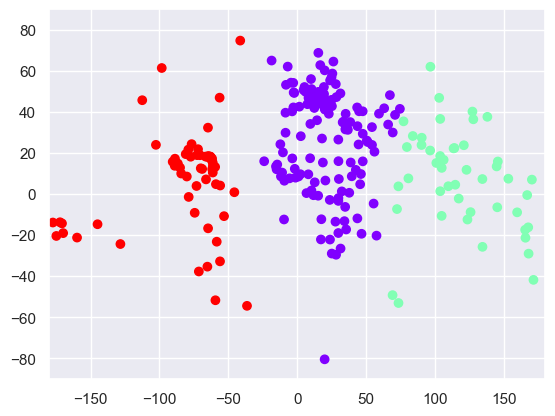

In [13]:
k = 3
kmeans = KMeans(k)
kmeans.fit(data)

plt.scatter(data_w_clusters['Longitude'], data_w_clusters['Latitude'], c=kmeans.predict(data), cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()